# The use of axes

Axes are a great option to add at the scenario declaration in order to make a variable v evolves in a given interval.

We'll show this opportunity with the illustration of the evolution of average rate and marginal rate of the French Income Tax

#### Initialisation

We import essential modules and initialize the tax and benefit system


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from openfisca_france import FranceTaxBenefitSystem   
tax_benefit_system = FranceTaxBenefitSystem()  # Create an instance of French Tax and Benefit system

## Income Tax Concavity : a progressive system ?

Let's observe how to declare a scenario  with an income evolving between 0 euros and 100000 euros per year.

In [ ]:
scenario = tax_benefit_system.new_scenario()

scenario.init_single_entity(
    
    # Axe declaration
    axes = [
        dict(                       #  in a dictionary
            count = 100,            # 'count' : indicates the number of step
            min = 0,
            max = 100000,
            name = 'salaire_de_base', # the variable you want to make evolve
            ),
        ],
    
    
    period = 2014,
     parent1 = dict(
        date_naissance = '1980-01-01',
         )
    )

simulation = scenario.new_simulation()

In [ ]:
simulation.calculate_add('salaire_de_base', 2014)

array([     0.     ,   1010.10114,   2020.2023 ,   3030.3027 ,
         4040.4045 ,   5050.5054 ,   6060.6055 ,   7070.707  ,
         8080.809  ,   9090.909  ,  10101.011  ,  11111.11   ,
        12121.211  ,  13131.315  ,  14141.414  ,  15151.515  ,
        16161.618  ,  17171.717  ,  18181.818  ,  19191.918  ,
        20202.021  ,  21212.121  ,  22222.22   ,  23232.326  ,
        24242.422  ,  25252.525  ,  26262.63   ,  27272.725  ,
        28282.828  ,  29292.932  ,  30303.03   ,  31313.13   ,
        32323.236  ,  33333.332  ,  34343.434  ,  35353.54   ,
        36363.637  ,  37373.74   ,  38383.836  ,  39393.938  ,
        40404.043  ,  41414.14   ,  42424.242  ,  43434.344  ,
        44444.44   ,  45454.547  ,  46464.652  ,  47474.75   ,
        48484.844  ,  49494.94   ,  50505.05   ,  51515.152  ,
        52525.26   ,  53535.363  ,  54545.45   ,  55555.55   ,
        56565.656  ,  57575.76   ,  58585.863  ,  59595.953  ,
        60606.06   ,  61616.16   ,  62626.26   ,  63636

In [ ]:
income_tax = - simulation.calculate('irpp', 2014)
gross_wage = simulation.calculate_add('salaire_de_base', 2014)
taxable_income = simulation.calculate_add('salaire_imposable', 2014)


Text(0.5,0,u'Gross Wage')

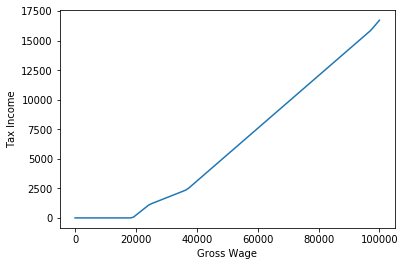

In [ ]:
plt.plot(gross_wage,income_tax)
plt.ylabel(u"Tax Income")
plt.xlabel(u"Gross Wage")

**NB** : The Income Tax is flat in opposite to common opinion.

## Average rate

In [ ]:
average_rate = income_tax / gross_wage
# the 1st value of gross_wage is zero, so there's a warning

[   -0.         -0.         -0.         -0.         -0.         -0.
    -0.         -0.         -0.         -0.         -0.         -0.
    -0.         -0.         -0.         -0.         -0.         -0.
    -0.         66.42151   272.37683   478.34143   684.29895   890.5364
  1096.4983   1218.7299   1321.7083   1424.827    1527.8077   1630.7878
  1733.7666   1836.8859   1939.8651   2042.8439   2145.8242   2248.9458
  2351.9229   2528.8452   2754.0625   2979.5876   3205.1072   3430.3289
  3655.8538   3881.073    4106.5933   4331.8145   4557.34     4782.5566
  5008.0815   5233.305    5458.83     5684.051    5909.5723   6134.7935
  6360.315    6585.535    6811.0566   7036.2773   7261.8057   7487.3247
  7712.5405   7938.068    8163.287    8388.814    8614.031    8839.561
  9064.776    9290.299    9515.524    9741.038    9966.265   10191.787
 10417.013   10642.528   10867.752   11093.281   11318.499   11544.02
 11769.54    11994.767   12220.289   12445.505   12671.029   12896.245
 13121.77

Text(0.5,0,u'Gross Wage')

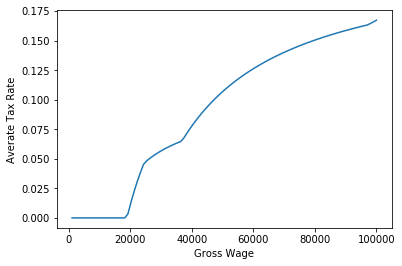

In [ ]:
plt.plot(gross_wage, average_rate)
plt.ylabel("Averate Tax Rate")
plt.xlabel("Gross Wage")

## Marginal rate

In [ ]:
marginal_rate =  (income_tax[:-1] - income_tax[1:]) / (taxable_income[:-1] - taxable_income[1:] ) 

Text(0.5,0,u'Gross Wage')

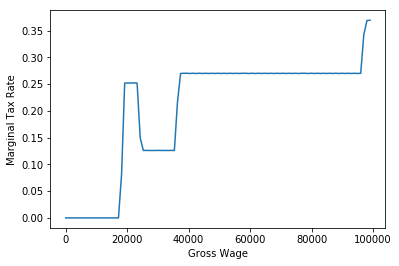

In [ ]:
plt.plot(gross_wage[:-1], marginal_rate)
plt.ylabel("Marginal Tax Rate")
plt.xlabel("Gross Wage")

In [ ]:
marginal_rate[25], marginal_rate[90]

(0.12595813, 0.26981202)

We can see the step in the French Tax scale of 14% and 30% (applied after a 10% deduction on the taxable income) 

### Notice :  dedicated fonctions in OpenFisca

Marginal and Average rate exist as functions implemented in OpenFisca. You can apply them on several income concept

In [ ]:
from openfisca_core.rates import average_rate, marginal_rate

In [ ]:
csg = simulation.calculate_add('csg', period = 2014)
csg

array([    0.      ,   -74.434586,  -148.86015 ,  -223.29471 ,
        -297.7293  ,  -372.15488 ,  -446.58942 ,  -521.024   ,
        -595.4586  ,  -669.8843  ,  -744.3187  ,  -818.7533  ,
        -893.17883 ,  -967.61346 , -1042.048   , -1116.4736  ,
       -1190.9083  , -1265.3428  , -1339.7686  , -1414.203   ,
       -1488.6375  , -1563.072   , -1637.4978  , -1711.9324  ,
       -1786.367   , -1860.7925  , -1935.2269  , -2009.6617  ,
       -2084.0872  , -2158.5217  , -2232.9565  , -2307.3813  ,
       -2381.8167  , -2456.2505  , -2530.6855  , -2605.1108  ,
       -2679.5457  , -2753.9802  , -2828.406   , -2902.84    ,
       -2977.275   , -3051.7007  , -3126.1353  , -3200.5698  ,
       -3275.0044  , -3349.4302  , -3423.8647  , -3498.2988  ,
       -3572.724   , -3647.1592  , -3721.5942  , -3796.019   ,
       -3870.4539  , -3944.8887  , -4019.3145  , -4093.7483  ,
       -4168.183   , -4242.618   , -4317.0435  , -4391.4775  ,
       -4465.913   , -4540.339   , -4614.773   , -4689.

In [ ]:
1 - average_rate(-csg[1:], gross_wage[1:])

array([0.07369024, 0.07368577, 0.07368726, 0.07368797, 0.07368666,
       0.07368726, 0.07368767, 0.07368797, 0.07368726, 0.07368755,
       0.07368779, 0.07368726, 0.07368749, 0.07368767, 0.07368726,
       0.07368743, 0.07368761, 0.07368726, 0.07368743, 0.07368755,
       0.07368767, 0.07368743, 0.07368749, 0.07368767, 0.07368737,
       0.07368749, 0.07368761, 0.07368737, 0.07368743, 0.07368755,
       0.07368731, 0.07368743, 0.07368749, 0.07368761, 0.07368743,
       0.07368749, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368743, 0.07368749, 0.07368755, 0.07368761, 0.07368743,
       0.07368749, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368743, 0.07368749, 0.07368755, 0.07368743, 0.07368749,
       0.07368755, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368749, 0.07368749, 0.07368755, 0.07368743, 0.07368749,
       0.07368749, 0.07368743, 0.07368749, 0.07368749, 0.07368755,
       0.07368749, 0.07368749, 0.07368755, 0.07368743, 0.07368

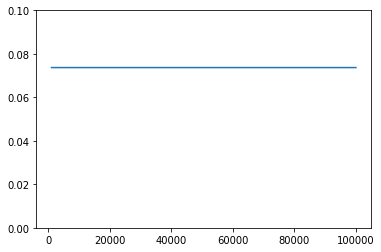

In [ ]:
plt.ylim(0,0.1)
plt.plot(gross_wage[1:], 1-average_rate(-csg[1:], gross_wage[1:]))